# Exploratory Data Analysis for WESAD

## Adaptive GPU Usage

In [1]:
#This code is for adaptive GPU usage
import keras.backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

Using TensorFlow backend.


## Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt

## Load Files

In [3]:
f = open('S2.pkl', 'rb')
temp = pickle._Unpickler(f)
temp.encoding = 'latin1'
pkl_dict = temp.load()
f.close()

In [4]:
pkl_dict

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
          [ 0.92579997, -0.2216    , -0.55379999],
          [ 0.90820003, -0.21960002, -0.53920001],
          ...,
          [ 0.87179995, -0.12379998, -0.30419999],
          [ 0.87300003, -0.12339997, -0.30260003],
          [ 0.87020004, -0.12199998, -0.30220002]]),
   'ECG': array([[ 0.02142334],
          [ 0.02032471],
          [ 0.01652527],
          ...,
          [-0.00544739],
          [ 0.00013733],
          [ 0.0040741 ]]),
   'EMG': array([[-0.00444031],
          [ 0.00434875],
          [ 0.00517273],
          ...,
          [-0.01716614],
          [-0.02897644],
          [-0.02357483]]),
   'EDA': array([[5.25054932],
          [5.26733398],
          [5.24330139],
          ...,
          [0.36048889],
          [0.36582947],
          [0.365448  ]]),
   'Temp': array([[30.120758],
          [30.129517],
          [30.138214],
          ...,
          [31.459229],
          [31.484283

In [5]:
eda_df = pd.read_csv('S2.csv', index_col=0)

/opt/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## ECG

Text(0.5, 1.0, 'ECG Data')

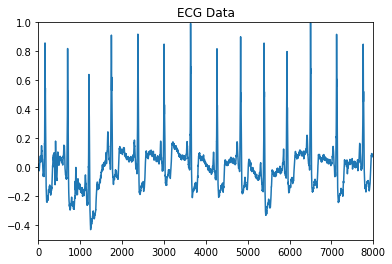

In [6]:
time_series = pkl_dict['signal']['chest']['ECG']
plt.plot(time_series)
plt.xlim(0, 8000)
plt.ylim(-0.5, 1)
plt.title("ECG Data")

## EMG

Text(0.5, 1.0, 'EMG Data')

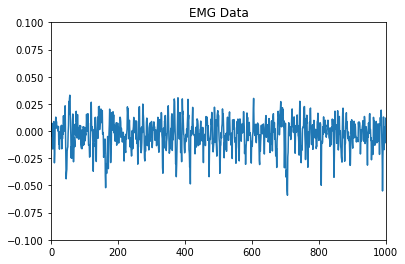

In [7]:
time_series = pkl_dict['signal']['chest']['EMG']
plt.plot(time_series)
plt.xlim(0, 1000)
plt.ylim(-0.1, 0.1)
plt.title("EMG Data")

## Accelerometer

Text(0.5, 1.0, 'Accelerometer Data')

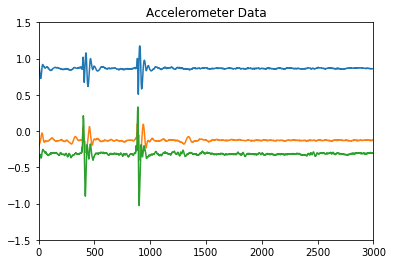

In [8]:
plt.plot(eda_df['chestACCx'])
plt.plot(eda_df['chestACCy'])
plt.plot(eda_df['chestACCz'])
plt.xlim(0, 3000)
plt.ylim(-1.5, 1.5)
plt.title("Accelerometer Data")

Text(0.5, 1.0, 'Accelerometer Data')

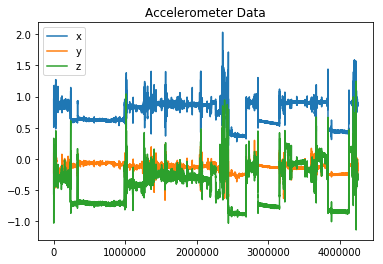

In [9]:
plt.plot(eda_df['chestACCx'])
plt.plot(eda_df['chestACCy'])
plt.plot(eda_df['chestACCz'])
plt.legend(['x', 'y', 'z'])
plt.title("Accelerometer Data")

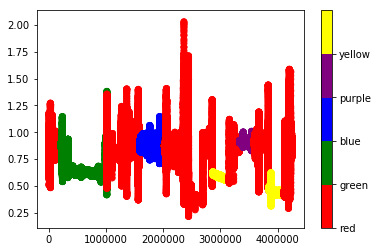

In [10]:
eda_df = eda_df[eda_df['label'] <= 4]
colors = ['red', 'green', 'blue', 'purple', 'yellow']
plt.scatter(eda_df.index, eda_df['chestACCx'], c=eda_df['label'], cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0, max(eda_df['label']), max(eda_df['label']) / float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

## EDA

Text(0.5, 1.0, 'EDA Data')

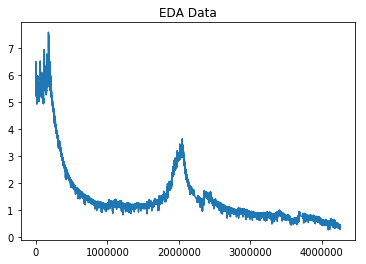

In [11]:
plt.plot(eda_df['chestEDA'])
plt.title("EDA Data")

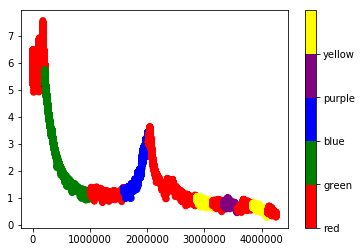

In [12]:
colors = ['red', 'green', 'blue', 'purple', 'yellow']
plt.scatter(eda_df.index, eda_df['chestEDA'], c=eda_df['label'], cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0, max(eda_df['label']), max(eda_df['label']) / float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)